# 보험료 예측

## 1. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일의 데이터를 전처리한 데이터프레임 리턴
def CreateDataFrame(filename):
    ''' 1. 데이터 프레임 생성 '''
    df = pd.read_csv(filename)
    
    ''' 2. 문자열 수치화 '''
    # male=0, female=1
    df = df.dropna(subset = ['sex'])
    df['sex'].replace(['male', 'female'], range(2), inplace=True)
    df['sex'] = df['sex'].astype('int')
    # smoker=1, non-smoker=0
    df['smoker'].replace(['no', 'yes'], range(2), inplace=True)
    # southwest=0, southeast=1, northwest=2, northeast=3
    df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], range(4), inplace=True)
    
    ''' 3. 결측치 처리 '''
    # bmi
    bmi_mean = df['bmi'].mean()
    bmi_mean = round(bmi_mean, 0)
    df['bmi'] = df['bmi'].fillna(bmi_mean)
    # children
    children_mean = df['children'].mean()
    children_mean = round(children_mean, 0)
    df['children'] = df['children'].fillna(children_mean)
    df['children'] = df['children'].astype('int')
    
    return df

df_train = CreateDataFrame("insurrance_train.csv") # 학습 데이터
df_test = CreateDataFrame("insurrance_test_label.csv") # 테스트 데이터

## 2. 이상치 확인

<AxesSubplot:xlabel='age', ylabel='Count'>

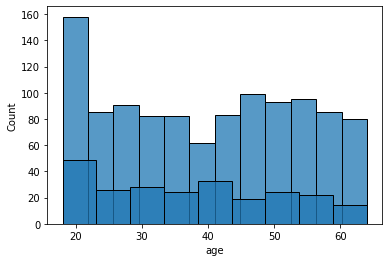

In [6]:
import seaborn as sns

# age
sns.histplot(data=df_train, x='age')
sns.histplot(data=df_test, x='age')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

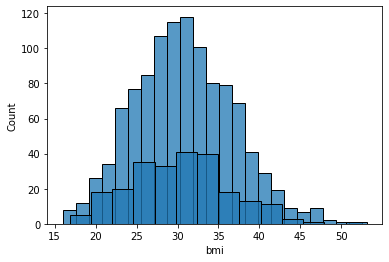

In [7]:
# bmi
sns.histplot(data=df_train, x='bmi')
sns.histplot(data=df_test, x='bmi')

<AxesSubplot:xlabel='children', ylabel='Count'>

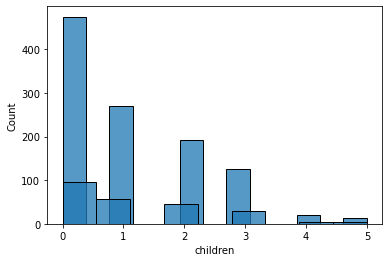

In [8]:
# children
sns.histplot(data=df_train, x='children')
sns.histplot(data=df_test, x='children')

<AxesSubplot:xlabel='charges', ylabel='Count'>

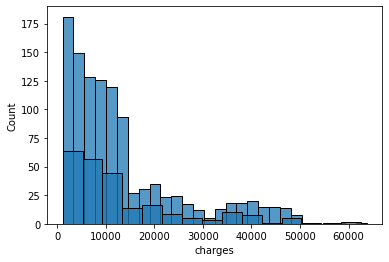

In [9]:
# charges
sns.histplot(data=df_train, x='charges')
sns.histplot(data=df_test, x='charges')

## 3. 스케일링

In [12]:
from sklearn.model_selection import train_test_split

# train data의 독립 변수와 종속 변수
X_train = df_train[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
Y_train = df_train[['charges']].values
# valid data의 독립 변수와 종속 변수
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
# 테스트 데이터의 독립 변수와 종속 변수
X_test = df_test[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
Y_test = df_test[['charges']].values

In [13]:
from sklearn.preprocessing import RobustScaler

# RobustScaler로 스케일링
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 3. 데이터 학습

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [152]:
# 모델별 객체 생성
knn = KNeighborsRegressor()
gbm = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

In [153]:
# 모델 학습
knn.fit(X_train, Y_train)
gbm.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)
lgbm.fit(X_train, Y_train)

C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\AppData\Local\Temp/ipykernel_9292/4149347531.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor()

In [154]:
# train 데이터의 종속 변수로 모델별 charhes 값 예측
pred_train_knn = knn.predict(X_train)
pred_train_gbm = gbm.predict(X_train)
pred_train_rf = rf.predict(X_train)
pred_train_xgb = xgb.predict(X_train)
pred_train_lgbm = lgbm.predict(X_train)

In [155]:
# val 데이터의 종속 변수로 모델별 charhes 값 예측
pred_val_knn = knn.predict(X_val)
pred_val_gbm = gbm.predict(X_val)
pred_val_rf = rf.predict(X_val)
pred_val_xgb = xgb.predict(X_val)
pred_val_lgbm = lgbm.predict(X_val)

In [156]:
from sklearn.metrics import mean_squared_error

# X_train으로 학습된 모델들의 Y_train과 Y_valid 값과의 MSE 계산
mse_train_knn = mean_squared_error(Y_train, pred_train_knn)
mse_val_knn = mean_squared_error(Y_val, pred_val_knn)
mse_train_gbm = mean_squared_error(Y_train, pred_train_gbm)
mse_val_gbm = mean_squared_error(Y_val, pred_val_gbm)
mse_train_rf = mean_squared_error(Y_train, pred_train_rf)
mse_val_rf = mean_squared_error(Y_val, pred_val_rf)
mse_train_xgb = mean_squared_error(Y_train, pred_train_xgb)
mse_val_xgb = mean_squared_error(Y_val, pred_val_xgb)
mse_train_lgbm = mean_squared_error(Y_train, pred_train_lgbm)
mse_val_lgbm = mean_squared_error(Y_val, pred_val_lgbm)

print("1. KNN \t\t\t train_rmse=%.4f, val_rmse=%.4f" % (np.sqrt(mse_train_knn), np.sqrt(mse_val_knn)))
print("2. GBM \t\t\t train_rmse=%.4f, val_rmse=%.4f" % (np.sqrt(mse_train_gbm), np.sqrt(mse_val_gbm)))
print("3. RF \t\t\t train_rmse=%.4f, val_rmse=%.4f" % (np.sqrt(mse_train_rf), np.sqrt(mse_val_rf)))
print("4. XGB \t\t\t train_rmse=%.4f, val_rmse=%.4f" % (np.sqrt(mse_train_xgb), np.sqrt(mse_val_xgb)))
print("5. LGBM \t\t train_rmse=%.4f, val_rmse=%.4f" % (np.sqrt(mse_train_lgbm), np.sqrt(mse_val_lgbm)))

1. KNN 			 train_rmse=4263.6352, val_rmse=5808.6872
2. GBM 			 train_rmse=3404.2971, val_rmse=5476.7223
3. RF 			 train_rmse=1850.3190, val_rmse=5475.4461
4. XGB 			 train_rmse=545.6366, val_rmse=5868.2668
5. LGBM 		 train_rmse=2713.7369, val_rmse=5323.7203


## 4. 튜닝

In [115]:
from sklearn.model_selection import GridSearchCV

# KNN parms
param_grid = {
    "n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15],
    "weights" : ['distance', 'uniform']
}

gcv = GridSearchCV(knn, param_grid, scoring="neg_mean_squared_error", verbose=2)
gcv.fit(X_train, Y_train)
print(gcv.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weig

In [147]:
# GBM parms
param_grid = {
    "n_estimators" : [100,  250, 500],
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.1, 0.05, 0.01],
    "subsample" : [0.9, 0.6, 0.3]
}

gcv = GridSearchCV(gbm, param_grid, scoring="neg_mean_squared_error", verbose=2)
gcv.fit(X_train, Y_train)
print(gcv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=250, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.3; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.9; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=250, subsample=0.3; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.3; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}


In [134]:
# RF parms
param_grid = {
    'n_estimators':[100, 500, 1000],
    'max_depth':[10, 14, 18],
    'min_samples_leaf':[4, 7, 11],
    'min_samples_split':[4, 8, 12]
}

gcv = GridSearchCV(rf, param_grid, scoring="neg_mean_squared_error", verbose=2)
gcv.fit(X_train, Y_train)
print(gcv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.9s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.9s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   2.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   2.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   2.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.9s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.9s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.9s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=100; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=100; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=500; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=18, min_samples_leaf=11, min_samples_split=12, n_estimators=1000; total time=   1.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 500}


In [100]:
# XGB parms
param_grid = {
    "colsample_bytree":[0.1, 0.5, 1.0],
    "min_child_weight":[3, 5, 7],
    "max_depth": [2, 6, 9],
    "n_estimators": [100, 500, 1000]
}

gcv = GridSearchCV(xgb, param_grid, scoring="neg_mean_squared_error", verbose=2)
gcv.fit(X_train, Y_train)
print(gcv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   0.5s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   0.5s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.1

[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=500; total time=   0.7s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=500; total time=   0.7s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=500; total time=   0.7s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=1000; total time=   1.5s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=1000; total time=   1.5s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=1000; total time=   1.6s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=1000; total time=   1.5s
[CV] END colsample_bytree=0.1, max_depth=6, min_child_weight=7, n_estimators=1000; total time=   1.5s
[CV] END colsample_bytree=0.1, max_depth=9, min_child_weight=3, n_estimators=100; tota

[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=5, n_estimators=1000; total time=   1.4s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=5, n_estimators=1000; total time=   1.3s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=5, n_estimators=1000; total time=   1.4s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=500; total time=   0.6s
[CV] END colsample_bytree=0.5, max_depth=2, min_child_weight=7, n_estimators=500; total 

[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=500; total time=   1.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=500; total time=   1.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=500; total time=   1.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=500; total time=   1.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=500; total time=   1.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=1000; total time=   2.0s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=1000; total time=   2.1s
[CV] END colsample_bytree=0.5, max_depth=9, min_child_weight=5, n_estimators=1000; total 

[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=1000; total time=   1.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=1000; total time=   1.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=1000; total time=   1.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=1000; total time=   1.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=3, n_estimators=1000; total time=   1.9s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=1.0, max_depth=6, min_child_weight=5, n_estimators=100; tota

In [109]:
# LGBM
param_grid = {
    "colsample_bytree":[0.8, 0.9, 1.0],
    "learning_rate":[0.1, 0.05, 0.01],
    "max_depth": [4, 6, 8],
    "n_estimators": [200, 500, 1000]
}

gcv = GridSearchCV(lgbm, param_grid, scoring="neg_mean_squared_error", verbose=2)
gcv.fit(X_train, Y_train)
print(gcv.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s

C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s

C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=6, n_estimators=1000; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.2s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.5s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.3s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.8s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.7s


C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [157]:
# 튜닝 후 모델 다시학습
knn = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
gbm = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 500, subsample = 0.9)
rf = RandomForestRegressor(max_depth = 18, min_samples_leaf = 7, min_samples_split = 8, n_estimators = 500)
xgb = XGBRegressor(colsample_bytree = 1.0, max_depth = 2, min_child_weight = 7, n_estimators = 100)
lgbm = LGBMRegressor(colsample_bytree = 1.0, learning_rate = 0.01, max_depth = 4, n_estimators = 500)

knn.fit(X_train, Y_train)
gbm.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)
lgbm.fit(X_train, Y_train)

C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\herju\AppData\Local\Temp/ipykernel_9292/2790931304.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
C:\Users\herju\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

## 5. 테스트

In [158]:
# test 데이터의 종속 변수로 모델별 charhes 값 예측
pred_test_knn = knn.predict(X_test)
pred_test_gbm = gbm.predict(X_test)
pred_test_rf = rf.predict(X_test)
pred_test_xgb = xgb.predict(X_test)
pred_test_lgbm = lgbm.predict(X_test)

In [159]:
# 행렬의 모양 맞추기
pred_test_knn = pred_test_knn.reshape(-1, 1)
pred_test_gbm = pred_test_gbm.reshape(-1, 1)
pred_test_rf = pred_test_rf.reshape(-1, 1)
pred_test_xgb = pred_test_xgb.reshape(-1, 1)
pred_test_lgbm = pred_test_lgbm.reshape(-1, 1)

# X_train으로 학습된 모델들의 Y_test와의 MSE 계산
mse_test_knn = mean_squared_error(Y_test, pred_test_knn)
mse_test_gbm = mean_squared_error(Y_test, pred_test_gbm)
mse_test_rf = mean_squared_error(Y_test, pred_test_rf)
mse_test_xgb = mean_squared_error(Y_test, pred_test_xgb)
mse_test_lgbm = mean_squared_error(Y_test, pred_test_lgbm)

print("1. KNN \t\t\t test_rmse=%.4f" % (np.sqrt(mse_test_knn)))
print("2. GBM \t\t\t test_rmse=%.4f" % (np.sqrt(mse_test_gbm)))
print("3. RF \t\t\t test_rmse=%.4f" % (np.sqrt(mse_test_rf)))
print("4. XGB \t\t\t test_rmse=%.4f" % (np.sqrt(mse_test_xgb)))
print("5. LGBM \t\t test_rmse=%.4f" % (np.sqrt(mse_test_lgbm)))

1. KNN 			 test_rmse=5372.2814
2. GBM 			 test_rmse=4700.0915
3. RF 			 test_rmse=4613.9420
4. XGB 			 test_rmse=4858.2583
5. LGBM 		 test_rmse=4704.9810


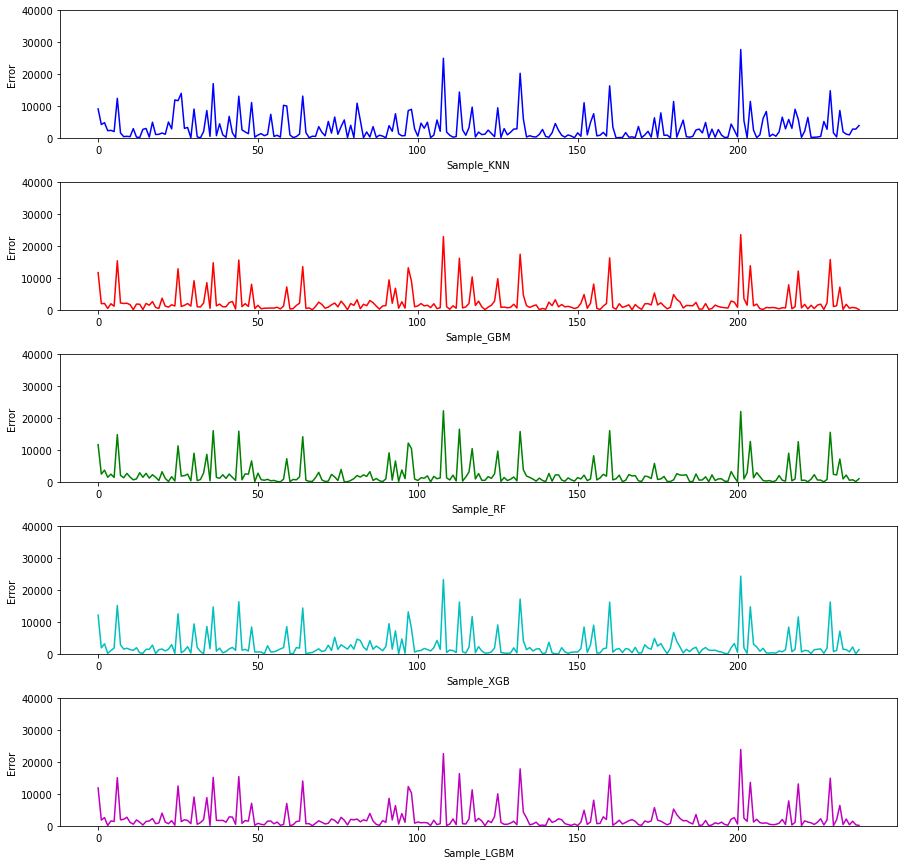

In [160]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.35)

# KNeighborsRegressor 모델의 오차 값 그래프
fig.add_subplot(5, 1, 1)
plt.plot(abs(pred_test_knn - Y_test), color = 'b')
plt.xlabel("Sample_KNN")
plt.ylabel("Error")
plt.ylim([0, 40000])

# GradientBoostingRegressor 모델의 오차 값 그래프
fig.add_subplot(5, 1, 2)
plt.plot(abs(pred_test_gbm - Y_test), color = 'r')
plt.xlabel("Sample_GBM")
plt.ylabel("Error")
plt.ylim([0, 40000])

# RandomForestRegressor 모델의 오차 값 그래프
fig.add_subplot(5, 1, 3)
plt.plot(abs(pred_test_rf - Y_test), color = 'g')
plt.xlabel("Sample_RF")
plt.ylabel("Error")
plt.ylim([0, 40000])

# XGBRegressor 모델의 오차 값 그래프
fig.add_subplot(5, 1, 4)
plt.plot(abs(pred_test_xgb - Y_test), color = 'c')
plt.xlabel("Sample_XGB")
plt.ylabel("Error")
plt.ylim([0, 40000])

# LGBMRegressor 모델의 오차 값 그래프
fig.add_subplot(5, 1, 5)
plt.plot(abs(pred_test_lgbm- Y_test), color = 'm')
plt.xlabel("Sample_LGBM")
plt.ylabel("Error")
plt.ylim([0, 40000])

plt.show()